# Postdam PM2.5 Baseline Forcasting

Between 2013 and 2023, data collected by DEBB021 was used. 

To increase the accuracy of PM2.5 data estimation, NO2, O3, SO2, PM10 pollutant gas data accepted by the EEA was added.


In [1]:
# imports
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import model_base as mb

## Data Exploration

* Load Data


In [2]:
df = mb.get_cleaned_df()
df.head()

,Start_Timestamp,End_Timestamp,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
0,1356998400,1357002000,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1,1357002000,1357005600,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
2,1357005600,1357009200,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
3,1357009200,1357012800,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
4,1357012800,1357016400,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Start_Timestamp,87648.0,1.514763e+09,9.108699e+07,1.356998e+09,1.435881e+09,1.514763e+09,1.593645e+09,1.672528e+09
End_Timestamp,87648.0,1.514767e+09,9.108699e+07,1.357002e+09,1.435884e+09,1.514767e+09,1.593649e+09,1.672531e+09
PM2.5-Pollutant,87648.0,6.001000e+03,0.000000e+00,6.001000e+03,6.001000e+03,6.001000e+03,6.001000e+03,6.001000e+03
PM2.5-Value,87648.0,1.303341e+01,1.018415e+01,7.700000e-01,6.000000e+00,1.003000e+01,1.700000e+01,1.940000e+02
PM2.5-Validity,87648.0,1.005545e+00,1.495142e-01,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
PM2.5-Verification,87648.0,1.000011e+00,3.377762e-03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
PM10-Pollutant,87648.0,5.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
PM10-Value,87648.0,1.786535e+01,1.249411e+01,8.000000e-01,9.300000e+00,1.491000e+01,2.320000e+01,7.053000e+02
PM10-Validity,87648.0,9.974557e-01,1.234824e-01,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00
PM10-Verification,87648.0,1.000011e+00,3.377762e-03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00


In [4]:
# set Start Date as an index
mb.set_start_index(df, 'Start_Timestamp')
df.head()

,End_Timestamp,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,PM10-Validity,...,O3-Pollutant,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification
Start_Timestamp,,,,,,,,,,,,,,,,,,,,,
1356998400,1357002000,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,1,...,7,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1
1357002000,1357005600,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,1,...,7,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1
1357005600,1357009200,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,1,...,7,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1
1357009200,1357012800,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,1,...,7,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1
1357012800,1357016400,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,1,...,7,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1


In [5]:
# Naive Forecast
df['Forcasted-PM2.5-Value'] = df['PM2.5-Value'].shift(1)

df.head()

,End_Timestamp,PM2.5-Pollutant,PM2.5-Value,PM2.5-Unit,PM2.5-Validity,PM2.5-Verification,PM10-Pollutant,PM10-Value,PM10-Unit,PM10-Validity,...,O3-Value,O3-Unit,O3-Validity,O3-Verification,SO2-Pollutant,SO2-Value,SO2-Unit,SO2-Validity,SO2-Verification,Forcasted-PM2.5-Value
Start_Timestamp,,,,,,,,,,,,,,,,,,,,,
1356998400,1357002000,6001,71.04,ug.m-3,1,1,5,88.96,ug.m-3,1,...,43.17,ug.m-3,1,1,1,12.18,ug.m-3,1,1,NaN
1357002000,1357005600,6001,20.52,ug.m-3,1,1,5,25.17,ug.m-3,1,...,57.15,ug.m-3,1,1,1,4.65,ug.m-3,1,1,71.04
1357005600,1357009200,6001,9.56,ug.m-3,1,1,5,11.97,ug.m-3,1,...,63.31,ug.m-3,1,1,1,1.33,ug.m-3,1,1,20.52
1357009200,1357012800,6001,9.45,ug.m-3,1,1,5,11.73,ug.m-3,1,...,63.18,ug.m-3,1,1,1,1.33,ug.m-3,1,1,9.56
1357012800,1357016400,6001,13.02,ug.m-3,1,1,5,15.88,ug.m-3,1,...,61.70,ug.m-3,1,1,1,1.33,ug.m-3,1,1,9.45


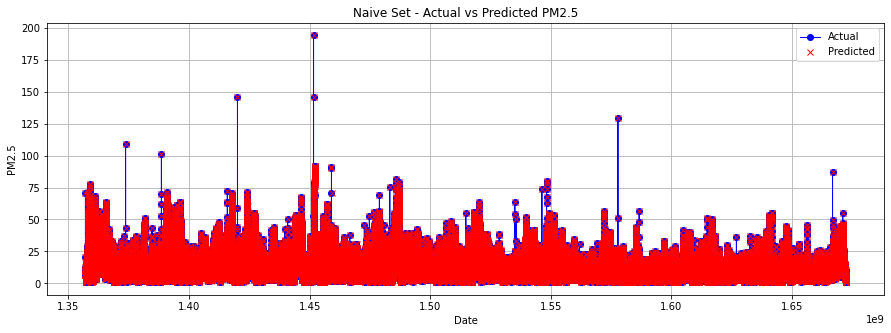

In [6]:
mb.plot_pm_true_predict(df, df['Forcasted-PM2.5-Value'], 'Naive')

## Error Metrics

* Mean Absolute Error (MAE): MAE measures the average absolute difference between the predicted values and the actual values. Lower MAE values indicate better accuracy.

* Mean Squared Error (MSE): MSE measures the average squared difference between predicted and actual values. It penalizes larger errors more heavily than MAE. Lower MSE values indicate better accuracy.

* Root Mean Squared Error (RMSE): RMSE is the square root of the MSE. It provides an interpretable measure in the same units as the original data. Lower RMSE values indicate better accuracy.

* Mean Absolute Percentage Error (MAPE): MAPE calculates the average percentage difference between predicted and actual values. It is expressed as a percentage. Lower MAPE values indicate better accuracy. However, be cautious with MAPE when dealing with small or zero actual values, as it can result in division by zero.

* Mean Absolute Scaled Error (MASE): MASE measures the relative accuracy of a forecasting model compared to a naive forecast (e.g., using the previous period's value). A MASE value of less than 1 suggests that the model is better than the naive forecast.


In [7]:
# drop first column
df = df.dropna()

# Error Metric

mb.evolve_error_metrics(df['PM2.5-Value'],df['Forcasted-PM2.5-Value'])
mb.naive_mean_absolute_scaled_error(df['PM2.5-Value'],df['Forcasted-PM2.5-Value'])

MAE: 1.2706
MSE: 5.4019
RMSE: 2.3242
MAPE: 0.1261
MASE: 1.0004424221898378


1.0004424221898378